## ImageNet UAP - Evaluation
We show evaluations on the following:
1. Evaluation on clean datasets (train, test)
2. White-box attacks (untargeted, targeted)
3. Transfer attacks

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import torch

sys.path.append(os.path.realpath('..'))

from utils import loader_imgnet, model_imgnet, evaluate

dir_data = '/data/ilsvrc2012/val'
dir_uap = '../uaps/imagenet/'
loader = loader_imgnet(dir_data, 10000, 250) # evaluate on 10,000 validation images

In [2]:
# load model
model = model_imgnet('resnet50')

Model loading complete.


## 1. Clean

In [3]:
_, _, _, _, outputs, labels = evaluate(model, loader, uap = None)
print('Accuracy:', sum(outputs == labels) / len(labels))

Accuracy: 0.772


## 2.1 Untargeted UAP

In [4]:
# load pattern
uap = torch.load(dir_uap + 'sgd-resnet50-eps10.pth')

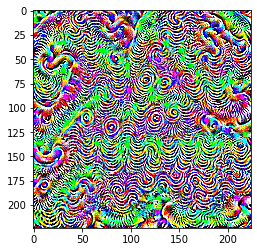

In [5]:
# visualize
uap_max = torch.max(uap)
plt.imshow(np.transpose(((uap / uap_max) + 1) / 2, (1, 2, 0)))

In [6]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, loader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))

Accuracy: 0.0686


## 2.2 Targeted UAP
Target: 859 Toaster

In [7]:
# load pattern
y_target = 859
uap = torch.load(dir_uap + 'sgd-tgt%i-resnet50-eps10.pth' % y_target)

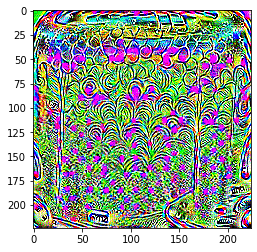

In [8]:
# visualize
uap_max = torch.max(uap)
plt.imshow(np.transpose(((uap / uap_max) + 1) / 2, (1, 2, 0)))

In [9]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, loader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))
print('Targeted success rate:', sum(outputs == y_target) / len(labels))

Accuracy: 0.2038
Targeted success rate: 0.6128


## 3.1 Transfer attack from SIN

In [10]:
# load pattern
uap = torch.load(dir_uap + 'sgd-resnet50_SIN-eps10.pth')

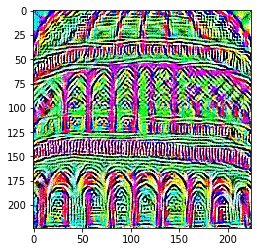

In [11]:
# visualize
uap_max = torch.max(uap)
plt.imshow(np.transpose(((uap / uap_max) + 1) / 2, (1, 2, 0)))

In [12]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, loader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))

Accuracy: 0.4336


## 3.2 Transfer attack from IN+SIN

In [13]:
# load pattern
uap = torch.load(dir_uap + 'sgd-resnet50_SIN-IN-eps10.pth')

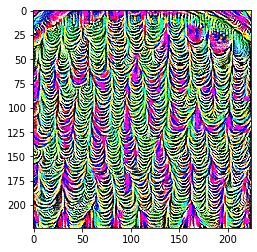

In [14]:
# visualize
uap_max = torch.max(uap)
plt.imshow(np.transpose(((uap / uap_max) + 1) / 2, (1, 2, 0)))

In [15]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, loader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))

Accuracy: 0.1296


## 3.3 Transfer attack from VGG-16

In [16]:
# load pattern
uap = torch.load(dir_uap + 'sgd-vgg16-eps10.pth')

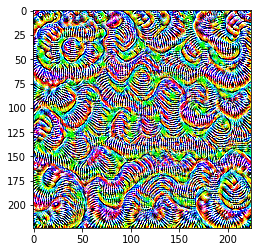

In [17]:
# visualize
uap_max = torch.max(uap)
plt.imshow(np.transpose(((uap / uap_max) + 1) / 2, (1, 2, 0)))

In [18]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, loader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))

Accuracy: 0.513
